___
CS3920 Assignment 2

___
functions

In [3]:
import numpy as np
import math as mt
from collections import Counter
from heapq import nsmallest


def inner_product(x:list, y:list)->float:
    """Calculate inner product of two vector

    Args:
        x1 (list): 1d vector array
        y1 (list): 1d vector array

    Returns:
        float: inner product of two vector
    """
    return np.dot(x, y)


def euclidean_distance(x:list, y:list) -> float:
    """distance between two point

    Args:
        x (list): vector array
        y (list): vector array

    Returns:
        float: distance of difference of two vector
    """
    return (np.dot(x,x)-2*np.dot(x,y)+np.dot(y,y))

def ec(x, y) -> float:
    """distance between two point

    Args:
        x (list): vector array
        y (list): vector array

    Returns:
        float: distance of difference of two vector
    """
    return np.sum((x - y) ** 2)


def most_frequent(list:list):
    """return the most frequent element from the list

    Args:
        list (list<E>): list

    Returns:
        E: most frequent element in the list
    """
    return Counter(list).most_common(1)[0][0]



def indice_sort(pq, k):
    """return index of elements when the list is sorted

    Args:
        pq (list): list to be sorted
        k (int): numbers of elements wanted to be sorted

    Returns:
        list: indice of sorted elements
    """
    c=[[pq[i],i] for i in range(len(pq))]
    return  nsmallest(k, c, key=lambda x: x[0])

def p_val(x:dict):
    """return p-value's from dictionary of distances

    Args:
        x (dict): dictionary of distances assign to the label

    Returns:
        dict: dictionary of p-value assign to the label
    """
    sum =0
    q = x.copy()
    for i in x.keys():
        sum += x[i]
    for i in x.keys():
        if x[i]==0:
            q[i] = float('inf')
        else:
            q[i] = (sum/x[i])-1
    return q







___
K Nearest Neighbours class

In [4]:
class KNN:
    def __init__(self,k=3):
        self.k = k

    def fit(self, X, y):
        """fit in the training set

        Args:
            X (array<m*n><float>): training sample dataset
            y (array<m*1><E>): training sample's label
        """
        self.X_train=X
        self.y_train=y

    def predict(self, X):
        """predict labels of the test set with the training sets

        Args:
            X (array<m*n><float>): test sample dataset

        Returns:
            array<m*1><E>: array of predicted label
        """
        predicted_sample = [self._predict(x) for x in X]
        return np.array(predicted_sample)

    def con_predict(self, X, y):
        """Conformal prediction on the given test set

        Args:
            X (array<m*n><float>): test sample dataset
            y (array<m*1><E>): test sample's label

        Returns:
            float: average false p-value
        """
        #create dictionary
        self.y_set = set(self.y_train)
        size = X.shape[0]
        predicted_sample = [self._con_predict(x) for x in X]
        result = [self._aver_fal_p(predicted_sample[i], y[i] ) for i in range(size)]
        return np.mean(result)

    def pd(self, X):
        """test"""
        predicted_sample = [self._p(x) for x in X]
        return np.array(predicted_sample)



    def _predict(self, x):
        """predict method of one sample

        Args:
            x (array<1*n>): one sample

        Returns:
            E: predicted label
        """
        k_indices = self._k_nearest_neighbor(x)
        #map index to label
        k_nearest_labels = [self.y_train[i[1]]for i in k_indices]
        # majority vote, most common class label
        return most_frequent(k_nearest_labels)

    def _p(self, x):
        """test"""
        k_indices = self._k_nearest_neighbor(x)
        #map index to label
        p_set = {}
        for i in k_indices:
            p_set.update({self.y_train[i[1]]:self.X_train[i[1]]})
        return p_set

    def _con_predict(self, x):
        """conformal prediction algorithm

        Args:
            x (array<1*n>): one sample

        Returns:
            dict: dictionary of sum of length of label-group
        """
        #map index to label
        k_indices = self._k_nearest_neighbor(x)
        #map index to label
        k_nearest_labels = [self.y_train[i[1]]for i in k_indices]
        #create dictionary
        dict = {}
        for j in self.y_set:
            dict.update({j:0})
        for i in k_indices:
            dict[self.y_train[i[1]]] += mt.sqrt(i[0])
        return dict

    def _k_nearest_neighbor(self, x):
        """algorithm for finding k-nearest neighbor

        Args:
            x (array<1*n>): one sample

        Returns:
            array<k*2>: [(distance from test sample, indice of training sample)]
            #distance included for further implementation
        """
        # compute distance of input and train set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # get indice of k nearest sample
        return indice_sort(distances,self.k)


    def _aver_fal_p(self, x, y):
        """calculate the false p-value of a sample

        Args:
            x (dict): dictionary of lengths from test sample
            y (E): true label of the test sample

        Returns:
            float: false p-value of the labelled test sample
        """
        x_new = p_val(x)
        fp =0
        denom = len(self.y_set)-1
        for i in x_new.keys():
            if i!=y:
                fp += x[i]
        return fp/denom

    def score(self, X_test, y_test):
        """accuracy of prediction of a test dataset

        Args:
            X (array<m*n><float>): test sample dataset
            y (array<m*1><E>): test sample's label

        Returns:
            float: accuracy score
        """
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)




___
import dataset

In [22]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()
usps_test = np.genfromtxt("zip.test", delimiter=" ")
usps_train = np.genfromtxt("zip.train", delimiter=" ")
usps = np.append(usps_test, usps_train, axis=0)
usps_y, usps_X = np.split(usps,[1],axis=1)
usps_y = usps_y.astype("i")
print("Dataset imported sucessfully")


Dataset imported sucessfully


___
Task Unit

In [56]:
class Tasks:
    def __init__(self,data_X:np.ndarray, data_y:np.ndarray):
        self.X = data_X
        self.y = data_y

    def split(self):
        list = train_test_split(self.X,
            self.y, random_state=412, test_size=0.2)
        self.train = (list[0], list[2])
        self.test = (list[1], list[3])
        return (self.train, self.test)

___
Run tasks: Wine

In [58]:
task1:Tasks = Tasks(wine['data'], wine['target'])
k = task1.split()
k[0][0]

array([[1.438e+01, 3.590e+00, 2.280e+00, ..., 1.040e+00, 3.440e+00,
        1.065e+03],
       [1.388e+01, 5.040e+00, 2.230e+00, ..., 5.800e-01, 1.330e+00,
        4.150e+02],
       [1.307e+01, 1.500e+00, 2.100e+00, ..., 1.180e+00, 2.690e+00,
        1.020e+03],
       ...,
       [1.285e+01, 3.270e+00, 2.580e+00, ..., 8.700e-01, 2.110e+00,
        5.700e+02],
       [1.260e+01, 1.340e+00, 1.900e+00, ..., 1.040e+00, 2.770e+00,
        5.620e+02],
       [1.293e+01, 2.810e+00, 2.700e+00, ..., 7.700e-01, 2.310e+00,
        6.000e+02]])

___
Run tasks: USPS

In [36]:
task2:Tasks = Tasks(usps_X, usps_y)

___
Test Error rate of Iris Dataset

Text(0, 0.5, 'Test Error rate')

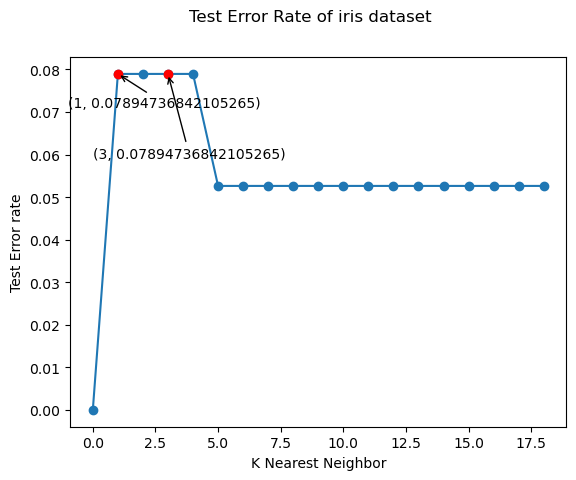

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'],
iris['target'], random_state=412)
result =np.empty(19)
for i in range(1,19):
    knn = KNN(k=i)
    knn.fit(X_train, y_train)
    result[i]=(1-knn.score(X_test, y_test))

plt.plot(np.arange(19), result,marker="o")
plt.plot(1,result[1],'ro')
txt1 = "({x1}, {y1})".format(x1 = 1, y1 = result[1])
plt.annotate(txt1, xy=(1,result[1]), xytext=(-1, result[1]*0.9),
             arrowprops=dict(arrowstyle="->"))
plt.plot(3,result[3],'ro')
txt1 = "({x1}, {y1})".format(x1 = 3, y1 = result[3])
plt.annotate(txt1, xy=(3,result[3]), xytext=(0, result[3]*0.75),
             arrowprops=dict(arrowstyle="->"))
plt.suptitle("Test Error Rate of iris dataset")
plt.xlabel("K Nearest Neighbor")
plt.ylabel("Test Error rate")


___
Test Error rate of Ionosphere dataset

Text(0, 0.5, 'Test Error rate')

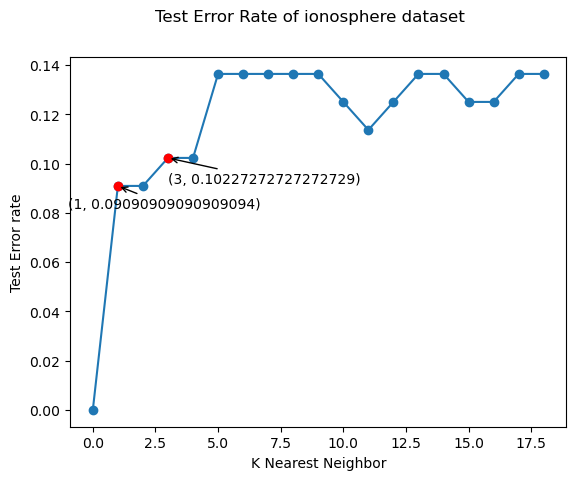

In [5]:
X_train, X_test, y_train, y_test = train_test_split(ionosphere_X, ionosphere_y, random_state=412)
result =np.empty(19)
for i in range(1,19):
    knn = KNN(k=i)
    knn.fit(X_train, y_train)
    result[i]=(1-knn.score(X_test, y_test))

plt.plot(np.arange(19), result,marker="o")
plt.plot(1,result[1],'ro')
txt1 = "({x1}, {y1})".format(x1 = 1, y1 = result[1])
plt.annotate(txt1, xy=(1,result[1]), xytext=(-1, result[1]*0.9),
             arrowprops=dict(arrowstyle="->"))
plt.plot(3,result[3],'ro')
txt1 = "({x1}, {y1})".format(x1 = 3, y1 = result[3])
plt.annotate(txt1, xy=(3,result[3]), xytext=(3, result[3]*0.9),
             arrowprops=dict(arrowstyle="->"))
plt.suptitle("Test Error Rate of ionosphere dataset")
plt.xlabel("K Nearest Neighbor")
plt.ylabel("Test Error rate")


___
 Average false p-value for the nearest neighbor conformal predictor applied to the iris dataset

Text(0, 0.5, 'Average false p-value')

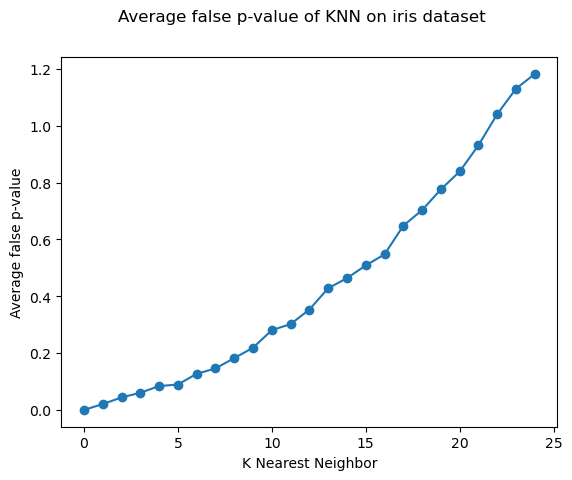

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'],
iris['target'], random_state=412)
K_max =25
result =np.empty(K_max)
for i in range(1,K_max):
    knn = KNN(k=i)
    knn.fit(X_train, y_train)
    result[i]=(knn.con_predict(X_test, y_test))

plt.plot(np.arange(K_max), result,marker="o")
plt.suptitle("Average false p-value of KNN on iris dataset")
plt.xlabel("K Nearest Neighbor")
plt.ylabel("Average false p-value")

___
 Average false p-value for the nearest neighbor conformal predictor applied to ionosphere dataset

Text(0, 0.5, 'Average false p-value')

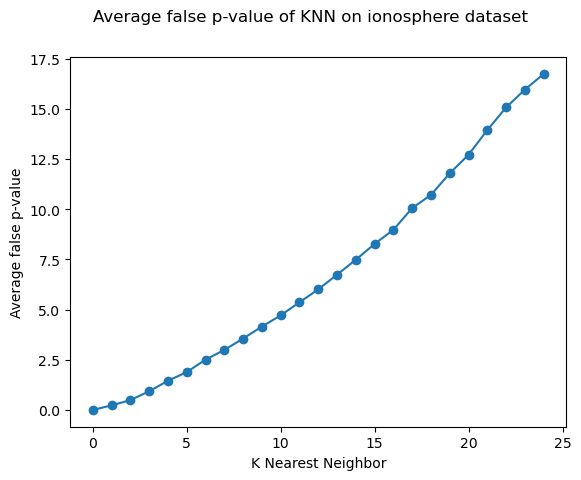

In [7]:
X_train, X_test, y_train, y_test = train_test_split(ionosphere_X,
ionosphere_y, random_state=412)
K_max =25
result =np.empty(K_max)
for i in range(1,K_max):
    knn = KNN(k=i)
    knn.fit(X_train, y_train)
    result[i]=(knn.con_predict(X_test, y_test))

plt.plot(np.arange(K_max), result,marker="o")
plt.suptitle("Average false p-value of KNN on ionosphere dataset")
plt.xlabel("K Nearest Neighbor")
plt.ylabel("Average false p-value")